# El modelo epidémico de SIR

 El modelo epidémico de SIR
Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

S(t) son aquellos susceptibles pero aún no infectados con la enfermedad;

I(t) es el número de individuos infecciosos;

R(t) son aquellas personas que se han recuperado de la enfermedad y ahora tienen inmunidad.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros,  beta y  gamma.  

Beta describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con  beta*N otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S/N).  

Gamma es la tasa de recuperación promedio: es decir, 1/ gamma es el período de tiempo promedio durante el cual una persona infectada puede transmitirlo.


Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]: \begin{align}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align} El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros  beta=0.2, gamma=10  en una población de N=1000 (quizás 'gripe en una escuela ) El modelo se inicia con una sola persona infectada el día 0: I(0)=1. Las curvas trazadas de S(t), I(t) y R(t) están diseñadas para verse un poco mejor que los valores predeterminados de Matplotlib.

Para ello deben seguir el siguiente tutorial 
 https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [9]:
# Total de la poblacion
N = 17000000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0


# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera alrededor en 15 días.
beta, gamma = 0.24, 1/15

# Debemos generar una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 365, 365)
y0 = S0, I0, R0
# Generamos una integracion de las ecuacion de SRI para la gruadricula en base al tiempo
ret = odeint(deriv, y0, t, args=(N, beta, gamma))


In [12]:
# Resultados
S, I, R = ret.T 
print("Susceptibles a infeccion")
print(S)
print()
print()
print("Numeros de infectados")
print(I)
print()
print()
print("Numeros de recuperados")
print(R)

Susceptibles a infeccion
[16999999.         16999998.73716002 16999998.42442537 16999998.05232469
 16999997.60958852 16999997.08280824 16999996.45602993 16999995.71027104
 16999994.82294564 16999993.76718036 16999992.5110005  16999991.01636172
 16999989.23799765 16999987.12204923 16999984.60443342 16999981.60890249
 16999978.04473475 16999973.80398722 16999968.75822647 16999962.75463905
 16999955.6114037  16999947.11218501 16999936.99958201 16999924.96733318
 16999910.651042   16999893.61714216 16999873.34976853 16999849.2351363
 16999820.54295574 16999786.40431999 16999745.7853969  16999697.45612899
 16999639.95299514 16999571.53470772 16999490.12950607 16999393.27245382
 16999278.03084625 16999140.91547564 16998977.77507797 16998783.6707785
 16998552.7267548  16998277.95262361 16997951.03221409 16997562.07238892
 16997099.30438953 16996548.72877961 16995893.69339851 16995114.39177986
 16994187.26717853 16993084.30462859 16991772.19025994 16990211.31335731
 16988354.58227358 16986146.

In [13]:
# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

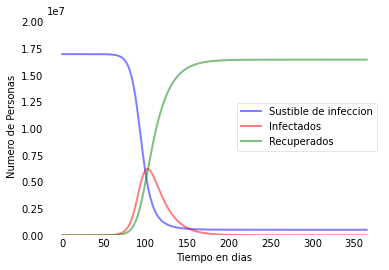

Resultado del modelo=  3.6


In [15]:

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Ro = beta/gamma
print("Resultado del modelo= ", Ro)

### Analisis

Las infecciones se reducen en comparación con aquellos que están enfermos y curados. Como puede verse en el gráfico, el número de personas susceptibles comienza a disminuir alrededor de los 100 días y se estabiliza después de 250 días. Por el contrario, el pico de infección se alcanza dentro de los 200 días posteriores al inicio de una pandemia,dando como resultado que la cantidad de personas infectadas tiende a aumentar rápidamente en unas pocas semanas desde el pico de la curva de recuperación, dada la tasa de recuperación de los ecuatorianos que están satisfechos con 100 días.  

### Conclusiones

Debemos manter el confinamiento y las medidas de bioseguridad necesaria para poder controlar la pandemia, ademas de que gracias a varios toques de queda se pudo controlar la cantidad de contagios, independientemente de la cantidad de eventos que se hicieron en donde la gente y su contagio aumento.
Esto se ve reflejado en la poca cantidad de UCI's, ya que muchos necesitan ser internados de manera urgente.
A mas de ellos podemosver que la curva de contagios disminuye y crece la de recuperados.

### Opinion

La tasa de contagios no es tan alta pero la cantidad de personas susceptibles si, por lo cual si dentro del pais no 

### Referencias

- COVID-19 dynamics with SIR model: https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
- https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
- https://rpubs.com/dsfernandez/422937
- https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2